In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [5]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

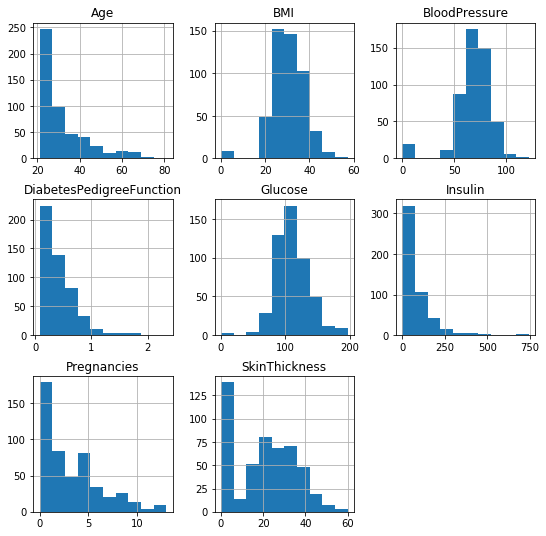

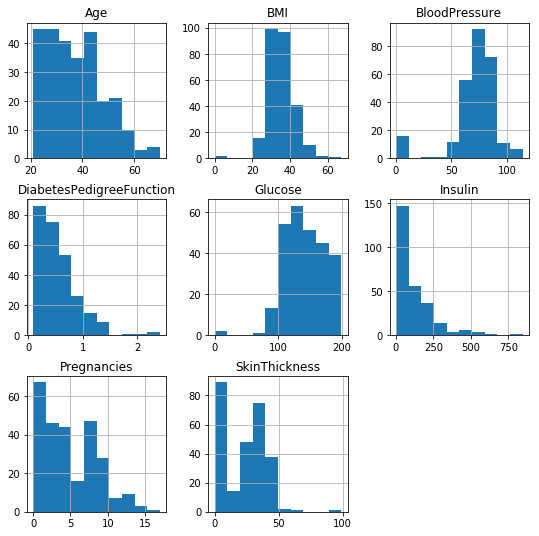

In [6]:
diabetes.groupby('Outcome').hist(figsize = (9,9))

In [7]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
print("Total : ",diabetes[diabetes.BloodPressure == 0].shape[0])

Total :  35


In [9]:
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')
      ['Age'].count())

Outcome
0    19
1    16
Name: Age, dtype: int64


In [10]:
print("Total : ",diabetes[diabetes.Glucose == 0].shape[0])

Total :  5


In [11]:
print(diabetes[diabetes.Glucose == 0].groupby('Outcome')
      ['Age'].count())

Outcome
0    3
1    2
Name: Age, dtype: int64


In [12]:
print("Total : ",diabetes[diabetes.SkinThickness == 0].shape[0])

Total :  227


In [13]:
print(diabetes[diabetes.SkinThickness == 0].groupby('Outcome')
      ['Age'].count())

Outcome
0    139
1     88
Name: Age, dtype: int64


In [14]:
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])


Total :  11


In [15]:
print(diabetes[diabetes.BMI == 0].groupby('Outcome')['Age'].count())


Outcome
0    9
1    2
Name: Age, dtype: int64


In [16]:
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])


Total :  374


In [17]:
print(diabetes[diabetes.Insulin == 0].groupby('Outcome')['Age'].count())

Outcome
0    236
1    138
Name: Age, dtype: int64


In [18]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) &
                       (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

In [19]:
print(diabetes_mod.shape)

(724, 9)


In [20]:
features_names = ['Pregnancies','Glucose','BloodPressure',
                 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',
                 'Age']
X = diabetes_mod[features_names]
y = diabetes_mod.Outcome


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
models = []

models.append(('KNN',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('LR',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('GB',GradientBoostingClassifier()))


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = 
                                                diabetes_mod.Outcome,random_state = 0)

In [25]:
names = []
scores = []

for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    names.append(name)
    
tr_split = pd.DataFrame({'Name':names,'scores':scores})
print(tr_split)

  Name    scores
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.729282
4   RF  0.740331
5  GNB  0.734807
6   GB  0.773481


In [33]:
strat_k_fold = StratifiedKFold(n_splits = 10,random_state = 10)

names = []
scores = []

for name, model in models:
    score = cross_val_score(model,X , y,cv = strat_k_fold,scoring = 'accuracy').mean()
    names.append(name)
    scores.append(score)
    
kf_cross_val = pd.DataFrame({'Name':names,'Score':scores})
print(kf_cross_val)


  Name     Score
0  KNN  0.711521
1  SVC  0.656075
2   LR  0.776440
3   DT  0.691145
4   RF  0.751763
5  GNB  0.755681
6   GB  0.762702


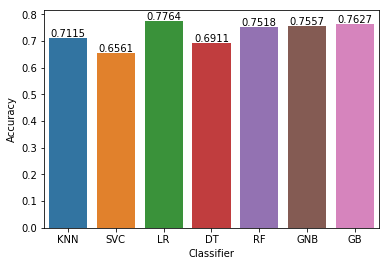

In [36]:
axis = sns.barplot(x = 'Name',y = 'Score',data = kf_cross_val)
axis.set(xlabel = 'Classifier',ylabel = 'Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2,height + 0.005, '{:1.4f}'.format(height),ha = 'center')
    
plt.show()